#UTS 

**Nama : Triasmi Dwi Farawati** 

**NIM : 200411100186**

**Kelas : Penambangan Data 5B**

Soal 

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

### Metode KNN

In [1]:
# melakukan import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [2]:
# mengakses data 
dataset_url = "https://raw.githubusercontent.com/triasmidwi/dataset/main/data.csv"
# membaca data
data = pd.read_csv(dataset_url)
#menampilkan data
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
#mengecek jumlah baris dan jumlah kolom
data.shape

(116, 10)

In [5]:
#membuat DataFrame kecuali kolom yang berisi target
X = data.drop(columns=['Classification'])
#mengecek apakah kolom targer sudah berhasil dihilangkan
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [6]:
#memisahkan kolom target dan dimasukkan ke dalam variable y
y = data['Classification'].values
#menampilkan isi kolom target dari data 0-4
y[0:5]

array([1, 1, 1, 1, 1])

In [7]:
#melakukan split dataset ke dalam bentuk data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# membuat KNN klasifikasi, dengan menetapkan K/n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
# melakukan pencocokan klasifikasi dengan data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#menampilkan 5 model prediksi pada data test
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [10]:
#mengecek akurasi dari data test
knn.score(X_test, y_test)

0.3333333333333333

Minimum error : -  0.4166666666666667 at K =  38


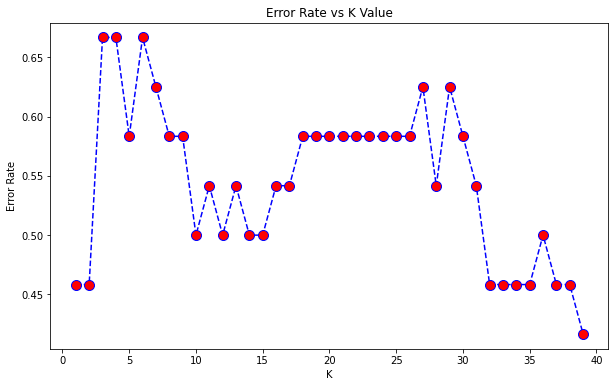

In [11]:
#melakukan perbandingan Error rate dengan nilai K dan ditampilkan dalam bentuk grafik
error_rate=[]
for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error : - ", min(error_rate), "at K = ", error_rate.index(min(error_rate)))

Maximum accuracy:- 0.5833333333333334 at K = 38


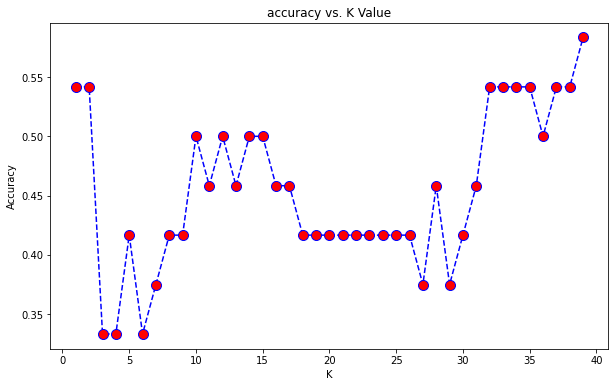

In [12]:
#melakukan perbandingan dengan membandingkan akurasi dengan nilai K dan ditampilkan dalam bentuk grafik
acc = []
#will take some time
from sklearn import metrics
for i in range(1,40):
  neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# membuat KNN klasifikasi, dengan menetapkan K/n_neighbors = 38
knn = KNeighborsClassifier(n_neighbors = 38)
# melakukan pencocokan klasifikasi dengan data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=38)

In [14]:
#menampilkan 5 model prediksi pada data test
knn.predict(X_test)[0:5]

array([2, 2, 2, 2, 2])

In [15]:
#mengecek akurasi dari data test setelah memasukkan k = 38 dan menghasilkan nilai akurasi yang lebih tinggi
knn.score(X_test, y_test)

0.5416666666666666

### Metode Decision Tree

In [28]:
# import library Scikit Learn untuk Decision Tree, Dataset dan Matlotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_iris


In [23]:
# mengakses data 
dataset_url = "https://raw.githubusercontent.com/triasmidwi/dataset/main/data.csv"
# membaca data
dataset = pd.read_csv(dataset_url)
#menampilkan data
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [24]:
#membuat DataFrame kecuali kolom yang berisi target
features = data.drop(columns=['Classification'])
#mengecek apakah kolom target sudah berhasil dihilangkan
features.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [25]:
#memisahkan kolom target dan dimasukkan ke dalam variable y
target = data['Classification'].values
#menampilkan isi kolom target dari data 0-4
#target[:4]
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


In [31]:
#Mengukur kualitas split. Kriteria yang didukung adalah "gini" untuk ketidakmurnian Gini dan "entropi" untuk perolehan informasi
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(features, target)

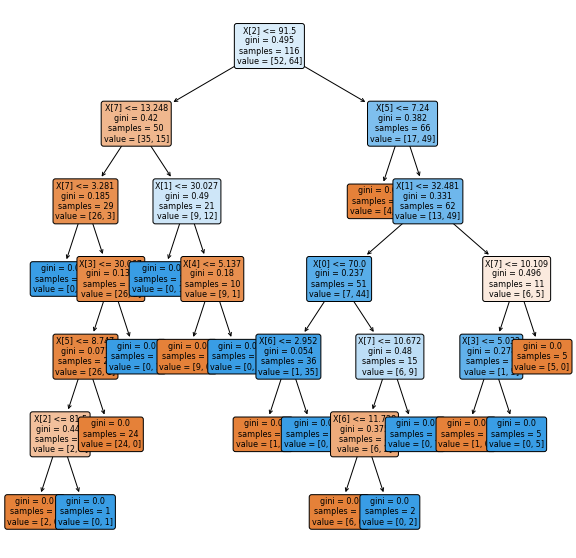

In [30]:
#plt gambar, atur latar belakang hitam
plt.figure(figsize=(10,10))
#membuat plot pohon
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#menampilkan pohon
plt.show()